In [12]:
import pandas as pd
import numpy as np
from calendar import monthrange
import statsmodels.api as sm

import matplotlib.pyplot as plt

In [62]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [63]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [64]:
series = milk.index
to_add = []
for idx, s in enumerate(series):
    year = int(str(s).split('-')[0])
    month = int(str(s).split('-')[1])
    n_day = monthrange(year, month)[1]
    
    to_add.append(milk.iloc[idx]['milk'] / n_day)

In [65]:
milk['daily'] = to_add
del to_add

In [66]:
milk.head()

,milk,daily
month,,
1962-01-01,589,19.000000
1962-02-01,561,20.035714
1962-03-01,640,20.645161
1962-04-01,656,21.866667
1962-05-01,727,23.451613


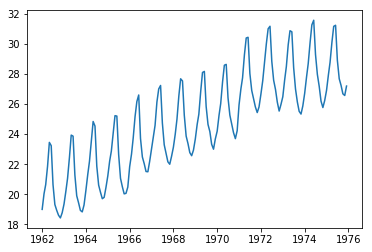

In [67]:
plt.plot(milk['daily'])
plt.show()

In [68]:
milk['daily_diff1'] = milk.daily - milk.daily.shift(1)

In [69]:
milk['daily_diff12'] = milk.daily - milk.daily.shift(12)

In [70]:
milk['daily_diff12_1'] = milk.daily_diff12 - milk.daily_diff12.shift(1)

In [71]:
milk.head()

,milk,daily,daily_diff1,daily_diff12,daily_diff12_1
month,,,,,
1962-01-01,589,19.000000,NaN,NaN,NaN
1962-02-01,561,20.035714,1.035714,NaN,NaN
1962-03-01,640,20.645161,0.609447,NaN,NaN
1962-04-01,656,21.866667,1.221505,NaN,NaN
1962-05-01,727,23.451613,1.584946,NaN,NaN


In [72]:
sm.tsa.stattools.adfuller(milk['daily'].dropna())[1]

0.6822151513081437

In [73]:
sm.tsa.stattools.adfuller(milk['milk'].dropna())[1]

0.627426708603034

In [74]:
sm.tsa.stattools.adfuller(milk['daily_diff1'].dropna())[1]

0.06430054654174842

In [75]:
sm.tsa.stattools.adfuller(milk['daily_diff12'].dropna())[1]

0.22127672658830344

In [76]:
sm.tsa.stattools.adfuller(milk['daily_diff12_1'].dropna())[1]

2.2808455518036712e-06

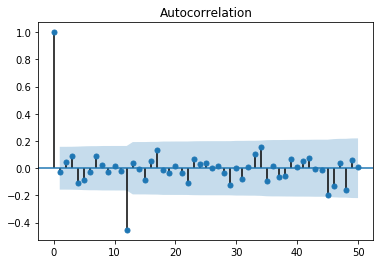

In [79]:
sm.graphics.tsa.plot_acf(milk['daily_diff12_1'].dropna().values.squeeze(), lags=50)

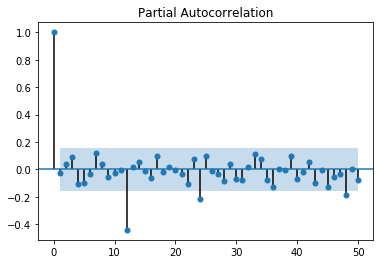

In [80]:
sm.graphics.tsa.plot_pacf(milk['daily_diff12_1'].dropna().values.squeeze(), lags=50)